In [ ]:
#import library

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('eco_rating.csv')
data = data.sample(frac=1).reset_index(drop=True).iloc[:800]

data

,user_id,item_id,ratings
0,91,60,4
1,72,105,4
2,24,173,4
3,68,7,4
4,84,82,3
...,...,...,...
795,99,77,3
796,63,26,2
797,13,54,3
798,115,144,4


In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# ini data training (80%) sebanyak 640 data

train

,user_id,item_id,ratings
264,46,116,3
615,109,118,3
329,55,17,4
342,34,11,2
394,29,161,3
...,...,...,...
71,77,137,5
106,35,137,3
270,126,58,3
435,25,50,2


In [ ]:
# ini data test (20%) sebanyak 160 data

test

,user_id,item_id,ratings
696,136,129,5
667,148,49,4
63,23,74,5
533,66,79,3
66,145,119,3
...,...,...,...
589,45,23,5
798,42,47,4
744,16,176,2
513,155,112,4


In [ ]:
#menghitung total jumlah user dan item yang unique

number_users = data['user_id'].nunique()
number_items = data['item_id'].nunique()

number_users, number_items


(156, 182)

In [ ]:
#create model NCF

user_input = tf.keras.layers.Input(shape=(1,))
item_input = tf.keras.layers.Input(shape=(1,))

user_embedding = tf.keras.layers.Embedding(number_users + 2, 16)(user_input)
item_embedding = tf.keras.layers.Embedding(number_items + 2, 16)(item_input)

user_flat = tf.keras.layers.Flatten()(user_embedding)
item_flat = tf.keras.layers.Flatten()(item_embedding)

concat = tf.keras.layers.Concatenate()([user_flat, item_flat])
dropout_1 = tf.keras.layers.Dropout(0.5)(concat)
dense_1 = tf.keras.layers.Dense(64, activation='relu')(dropout_1)
dropout_2 = tf.keras.layers.Dropout(0.3)(dense_1)
dense_2 = tf.keras.layers.Dense(16, activation='relu')(dropout_2)
output = tf.keras.layers.Dense(1)(dense_2)

model = tf.keras.models.Model(inputs=[user_input, item_input], outputs=output)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 1, 16)                2528      ['input_9[0][0]']             
                                                                                                  
 embedding_9 (Embedding)     (None, 1, 16)                2944      ['input_10[0][0]']            
                                                                                            

In [ ]:
#model compiler with optimizer and loss mse

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
#training data with model

history = model.fit([train['user_id'], train['item_id']], train['ratings'], epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2605 - val_loss: 1.2765
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2893 - val_loss: 1.2374
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2850 - val_loss: 1.2056
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2815 - val_loss: 1.2931
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2942 - val_loss: 1.3107
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2736 - val_loss: 1.3925
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2654 - val_loss: 1.2765
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2700 - val_loss: 1.2720
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3203 - val_loss: 1.1608
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2846 - val_loss: 1.2039
Epoch 11/

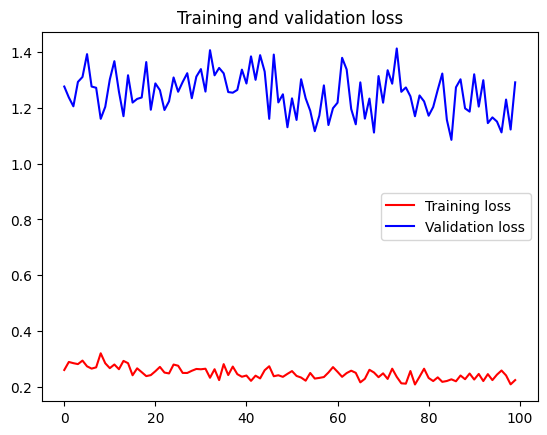

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
user_id = test.iloc[0]['user_id']
place_id = test.iloc[0]['item_id']
rating = test.iloc[0]['ratings']
predictions = model.predict([np.array([user_id]), np.array([place_id])])
print(f'Predicted Rating for user2 {user_id} and destination3 {place_id}: {predictions}')

1/1 [==============================] - 0s 23ms/step
Predicted Rating for user2 136 and destination3 129: [[3.224371]]


20/20 [==============================] - 0s 3ms/step


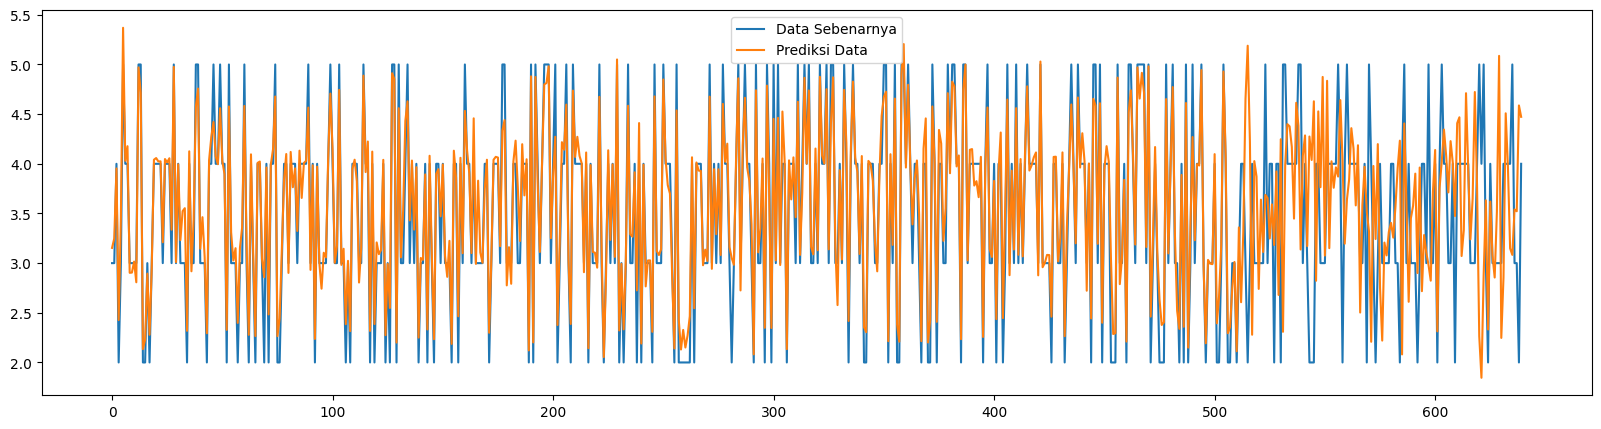

In [ ]:
#Prediksi pada data training

prediction_train = model.predict([train['user_id'].values, train['item_id'].values])
x1 = np.arange(len(train))
plt.figure(figsize=(20,5))

plt.plot(x1, train['ratings'].values, label='Data Sebenarnya')
plt.plot(x1, prediction_train, label='Prediksi Data')
plt.legend()

In [ ]:
#evaluate model with train data - MAE

result_mae = model.evaluate([train['user_id'], train['item_id']], train['ratings'])
print(f'MAE: {result_mae}')

20/20 [==============================] - 0s 6ms/step - loss: 0.3139
MAE: 0.3139042258262634


Disini MAE saat training bernilai 0.31, terlihat pada grafik diatas nilai prediksi data training dengan data sebenarnya saling mendekati.

5/5 [==============================] - 0s 3ms/step


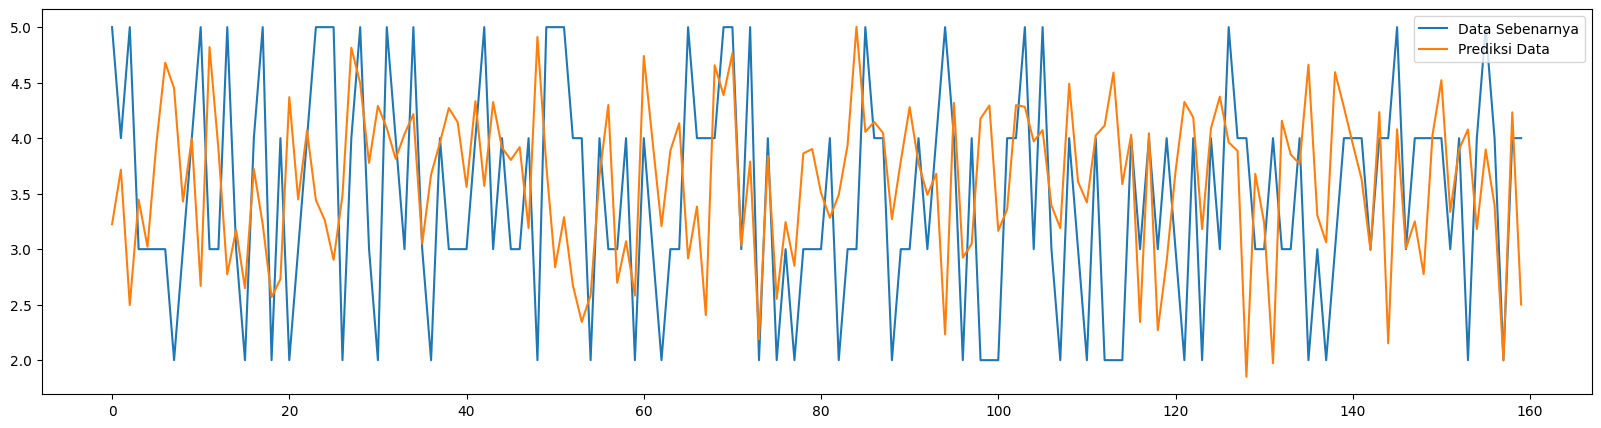

In [ ]:
#Prediksi pada data test

prediction_test = model.predict([test['user_id'].values, test['item_id'].values])
x1 = np.arange(len(test))
plt.figure(figsize=(20,5))

plt.plot(x1, test['ratings'].values, label='Data Sebenarnya')
plt.plot(x1, prediction_test, label='Prediksi Data')
plt.legend()

In [ ]:
#evaluate model with test data - MAE

result_mae = model.evaluate([test['user_id'], test['item_id']], test['ratings'])
print(f'MAE: {result_mae}')

5/5 [==============================] - 0s 4ms/step - loss: 1.4198
MAE: 1.4197807312011719


disini MAE bernilai 1.42 saat dilakukan prediksi pada data testing, yang dimana bisa kita lihat pada nilai val_loss saat setiap epoch masih bernilai > 1.0  . Hasil tersebut masih kurang cukup bagus sehingga bisa kita lihat grafik diatas tidak saling cukup bersinggungan antara data predict dan sebenarnya.